In [ ]:
import sys

sys.path.append('..')

from benchmark.ackley import Ackley
from benchmark.himmelblau import Himmelblau
from benchmark.holder import Holder
from benchmark.rastrigin import Rastrigin
from benchmark.rosenbrock import Rosenbrock
from benchmark.sphere import Sphere
from benchmark.cos import Cos
from benchmark.branin import Branin
from benchmark.eggholder import EggHolder
from benchmark.drop_wave import Drop_Wave
from benchmark.goldstein_price import Goldstein_Price
from benchmark.camel import Camel
from benchmark.levy import Levy
from optims.SBS import SBS
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def eval_to_sbs_params(n_eval):
  if n_eval < 10:
    return (1, 10)
  elif n_eval // 10 <= 100:
    return (n_eval // 10, 10)
  else:
    return (100, n_eval // 100)

In [29]:
def create_bounds(min, max, dim):
    bounds = [(min, max) for _ in range(dim)]
    return np.array(bounds)

In [ ]:
functions = {
            "Ackley": [Ackley(), create_bounds(-32.768, 32.768, 2)],
            "Branin": [Branin(), np.array([(-5, 10), (0, 15)])],
            "Drop Wave": [Drop_Wave(), create_bounds(-5.12, 5.12, 2)],
            "Egg Holder": [EggHolder(), create_bounds(-512, 512, 2)],
            "Goldstein Price": [Goldstein_Price(), create_bounds(-2, 2, 2)],
            "Himmelblau": [Himmelblau(), create_bounds(-4, 4, 2)],
            "Holder Table": [Holder(), create_bounds(-10, 10, 2)],
            "Rastrigin": [Rastrigin(), create_bounds(-5.12, 5.12, 2)],
            "Rosenbrock": [Rosenbrock(), create_bounds(-3, 3, 2)],
            "Camel": [Camel(), create_bounds(-3, 3, 2)],
            "Levy": [Levy(), create_bounds(-10, 10, 2)],
            "Sphere": [Sphere(), create_bounds(-10, 10, 2)],
        }

300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300
300


Text(0, 0.5, 'Error')

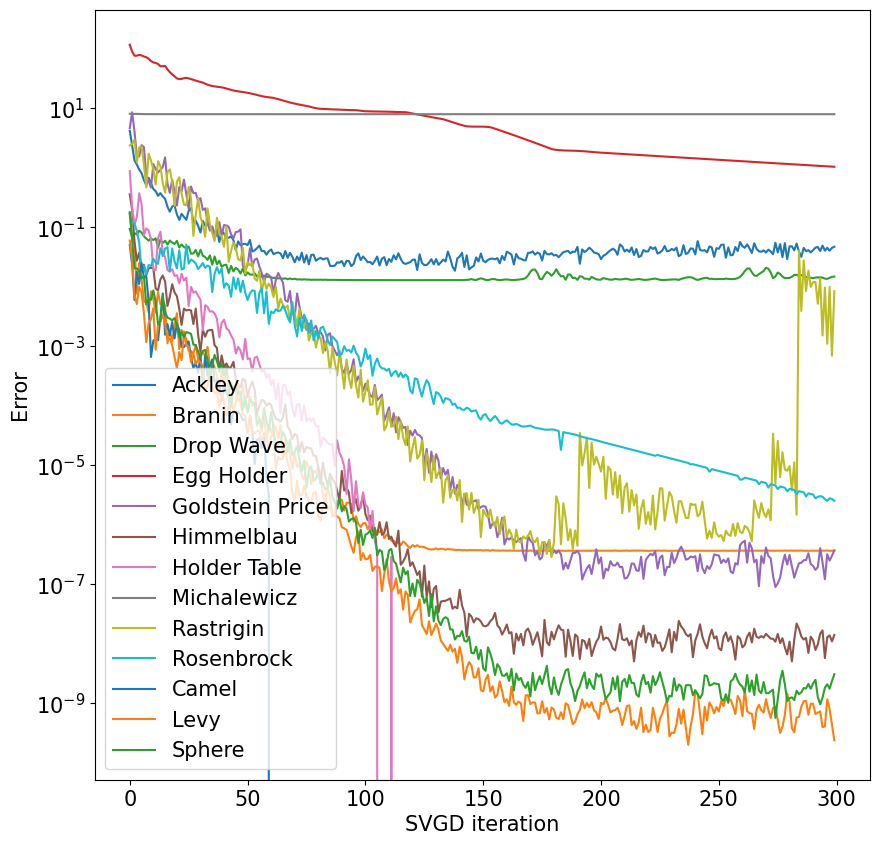

In [ ]:
plt.figure(figsize=(10, 5))
#plt.rcParams.update({'font.size': 15})

for f_name in functions.keys():
  bounds = functions[f_name][1]
  sbs = SBS(bounds, 500, [10_000], 300, sigma=1/500**2)
  res_matrix = []
  for _ in range(10):
    res = sbs.optimize(functions[f_name][0], return_best_iter=True)[-1]
    res_matrix.append(res)
  res_mean = np.mean(res_matrix, axis=0)

  plt.plot(range(len(res_mean)), np.array(res_mean) - functions[f_name][0].min, label=f_name)
plt.legend()
plt.yscale("log")
plt.xlabel("SVGD iteration")
plt.ylabel("Error")
plt.savefig("error_vs_eval_sbs.pdf", bbox_inches="tight")